### 1. Presentación del problema de investigación

¿Qué factores influyen en la asistencia de público a los partidos de la Copa del Mundo?

### 2. Contexto: ¿Por qué es relevante este problema?

La asistencia a los estadios es un indicador clave en el análisis de grandes eventos deportivos, ya que refleja no solo el interés por el fútbol, sino también la influencia de factores **sociales, culturales y económicos**. Comprender estos elementos es fundamental porque permite identificar las condiciones que favorecen o limitan la participación del público, lo cual impacta directamente en la **rentabilidad, la organización y la experiencia** de los asistentes.

Entre los factores que podrían influir en la asistencia se encuentran:
-   La etapa del torneo (fase de grupos, eliminatorias, finales).
-   El país y la ciudad sede.
-   La capacidad del estadio.
-   Los equipos participantes.
-   La relevancia histórica del partido.

Aun así, la magnitud de la influencia de cada una de estas variables y su interacción sigue siendo un tema de debate, especialmente al comparar diferentes ediciones de la Copa del Mundo y contextos culturales diversos.

### 3. Relación entre el problema y la base de datos

Para abordar esta pregunta, se utilizará el conjunto de datos **World Cup Matches**, que contiene información detallada de los partidos de la Copa del Mundo, incluyendo el año, el estadio, la ciudad, los equipos, los goles, los árbitros y la **asistencia**.

La variable `Attendance`, junto con variables contextuales como el estadio, la etapa y los equipos, permite analizar qué factores se asocian con la asistencia de público e identificar patrones que ayuden a comprender mejor la dinámica de los espectadores en este evento deportivo global.

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/maikol0629/data-sciense/eee1779845363b0e21b06fa14e22666efae10113/data/WorldCupMatches.csv")
df1 = pd.read_csv("https://raw.githubusercontent.com/maikol0629/data-sciense/eee1779845363b0e21b06fa14e22666efae10113/data/WorldCupPlayers.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/maikol0629/data-sciense/eee1779845363b0e21b06fa14e22666efae10113/data/WorldCups.csv")

In [7]:
##Sutil visualizacion de la bd
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [15]:
df["Attendance"]

0        4444.0
1       18346.0
2       24059.0
3        2549.0
4       23409.0
         ...   
4567        NaN
4568        NaN
4569        NaN
4570        NaN
4571        NaN
Name: Attendance, Length: 4572, dtype: float64

In [8]:
# Número de registros y variables
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")

Número de registros: 4572
Número de variables: 20


In [9]:
# Tipos de datos
print("\nTipos de datos por variable:")
print(df.dtypes.value_counts())


Tipos de datos por variable:
object     12
float64     8
Name: count, dtype: int64


In [10]:
# Clasificación de variables
categoricas = df.select_dtypes(include=['object']).columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🔹 Variables categóricas:")
print("\n".join([f"- {col}" for col in categoricas]))

print("\n🔸 Variables numéricas:")
print("\n".join([f"- {col}" for col in numericas]))

🔹 Variables categóricas:
- Datetime
- Stage
- Stadium
- City
- Home Team Name
- Away Team Name
- Win conditions
- Referee
- Assistant 1
- Assistant 2
- Home Team Initials
- Away Team Initials

🔸 Variables numéricas:
- Year
- Home Team Goals
- Away Team Goals
- Attendance
- Half-time Home Goals
- Half-time Away Goals
- RoundID
- MatchID


In [11]:
# Descripción general
print("\nDescripción de variables numéricas:")
print(df.describe())


Descripción de variables numéricas:
              Year  Home Team Goals  Away Team Goals     Attendance  \
count   852.000000       852.000000       852.000000     850.000000   
mean   1985.089202         1.811033         1.022300   45164.800000   
std      22.448825         1.610255         1.087573   23485.249247   
min    1930.000000         0.000000         0.000000    2000.000000   
25%    1970.000000         1.000000         0.000000   30000.000000   
50%    1990.000000         2.000000         1.000000   41579.500000   
75%    2002.000000         3.000000         2.000000   61374.500000   
max    2014.000000        10.000000         7.000000  173850.000000   

       Half-time Home Goals  Half-time Away Goals       RoundID       MatchID  
count            852.000000            852.000000  8.520000e+02  8.520000e+02  
mean               0.708920              0.428404  1.066177e+07  6.134687e+07  
std                0.937414              0.691252  2.729613e+07  1.110572e+08  
min

In [12]:
# Conteo de valores faltantes ordenado de mayor a menor
faltantes = df.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])  # Solo muestra variables con al menos un valor faltante


Conteo de valores faltantes por variable:
Attendance              3722
Datetime                3720
Home Team Initials      3720
MatchID                 3720
RoundID                 3720
Assistant 2             3720
Assistant 1             3720
Referee                 3720
Half-time Away Goals    3720
Half-time Home Goals    3720
Year                    3720
Win conditions          3720
Away Team Name          3720
Away Team Goals         3720
Home Team Goals         3720
Home Team Name          3720
City                    3720
Stadium                 3720
Stage                   3720
Away Team Initials      3720
dtype: int64


In [16]:
# Conteo de valores únicos por variable
print("\nConteo de valores únicos por variable:")
print(df.nunique().sort_values(ascending=False))


Conteo de valores únicos por variable:
MatchID                 836
Attendance              622
Datetime                602
Assistant 2             408
Assistant 1             387
Referee                 366
Stadium                 181
City                    151
RoundID                 101
Away Team Name           83
Away Team Initials       82
Home Team Name           78
Home Team Initials       77
Win conditions           43
Stage                    23
Year                     20
Home Team Goals          11
Half-time Home Goals      7
Away Team Goals           7
Half-time Away Goals      6
dtype: int64


In [21]:
# Variables más importantes 
variables_clave = ['Stadium', 'City', 'Stage', 'Home Team Name','Away Team Name', 'Attendance']
print("\nVista rápida de variables clave:")
print(df[variables_clave].head())
# Vista rápida de las variables clave
print("\nEstadísticas descriptivas de variables clave:")
print(df[variables_clave].describe())


Vista rápida de variables clave:
          Stadium         City    Stage Home Team Name Away Team Name  \
0         Pocitos  Montevideo   Group 1         France         Mexico   
1  Parque Central  Montevideo   Group 4            USA        Belgium   
2  Parque Central  Montevideo   Group 2     Yugoslavia         Brazil   
3         Pocitos  Montevideo   Group 3        Romania           Peru   
4  Parque Central  Montevideo   Group 1      Argentina         France   

   Attendance  
0      4444.0  
1     18346.0  
2     24059.0  
3      2549.0  
4     23409.0  

Estadísticas descriptivas de variables clave:
          Attendance
count     850.000000
mean    45164.800000
std     23485.249247
min      2000.000000
25%     30000.000000
50%     41579.500000
75%     61374.500000
max    173850.000000


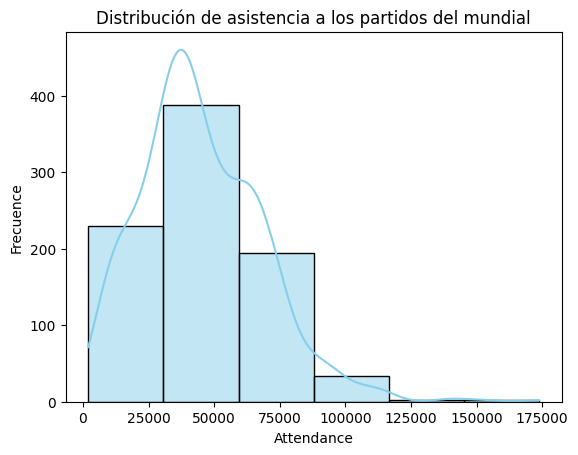

In [30]:
# Histograma: distribución de edad
sns.histplot(df['Attendance'], bins=6, kde=True, color='skyblue')
plt.title("Distribución de asistencia a los partidos del mundial")
plt.xlabel("Attendance")
plt.ylabel("Frecuence")
plt.show()

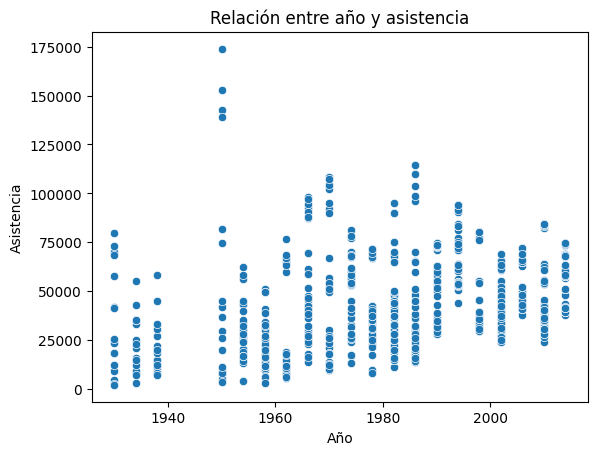

In [35]:
# Gráfico de dispersión: calificación final vs ausencias
sns.scatterplot(x='Year', y='Attendance', data=df)
plt.title("Relación entre año y asistencia")
plt.xlabel("Año")
plt.ylabel("Asistencia")
plt.show()

## Conclusiones
### 
##### 1.Todas las caraceteristicas tienen al menos 3720 muestras 
##### 2. Las mayor parte de la asistencia registrada oscila entre 25000 y 50000
##### 3. Se cuenta con 8 caracteristicas categoricas y 12 caracteristicas numericas
##### 4. Las graficas muestran que el pico más alto de asistencia fué entre el año 1940 y 1960

##### Este primer acercamiento es bastante útil para las decisiones posterios sobre el dataset.